 # Домашнее задание 1. Линейные модели

### Фамилия Имя Группа

В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача классификации</th>
            <th colspan=5>Задача регрессии</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача регрессии**

A. [Набор данных](https://www.kaggle.com/aungpyaeap/fish-market) Таблица `Fish.csv`. Задача: построить модель, предсказывающую вес рыбы (колонка `Weight`). Baseline: RMSE (root mean square error) = 83.7

B. [Набор данных](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) Таблица `Car details v3.csv`. Задача: построить модель, предсказывающую стоимость автомобиля (колонка `selling_price`). Baseline: RMSE (root mean square error) = 110000

C. [Набор данных](https://www.kaggle.com/quantbruce/real-estate-price-prediction) Таблица `Real estate.csv`. Задача: построить модель, предсказывающую стоимость квадратного метра жилья (колонка `Y house price of unit area`). Baseline: RMSE (root mean square error) = 8

D. [Набор данных](https://www.kaggle.com/mirichoi0218/insurance) Таблица `insurance.csv`. Задача: построить модель, предсказывающую стоимость медицинской страховки (колонка `charges`). Baseline: RMSE (root mean square error) = 5800

E. [Набор данных](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) Объединить таблицы `winequality-white.csv` и `winequality-red.csv`. Задача: построить модель, предсказывающую качество вина (колонка `quality`). Baseline: RMSE (root mean square error) = 0.8


---

**Задача классификации**

K. [Набор данных](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data) Таблица `train.csv`. Задача: детектировать токсичные комментарии (0 или 1 в колонке `toxic`) исключительно по содержимому комментария (колонка `comment_text`). Baseline: sklearn.metrics.f1_score(average='macro') по колонке `toxic` = 0.86

L. [Набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) Таблица `WA_Fn-UseC_-HR-Employee-Attrition.csv`. Задача: предсказать увольнение сотрудника (колонка `attrition`). Baseline: sklearn.metrics.f1_score(average='macro') = 0.70

M. [Набор данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset) Таблица `spam.csv` (при загрузку датасета в питоне использовать кодировку encoding='latin-1'). Задача: детектировать, является ли СМС-сообщение спамом. Baseline: sklearn.metrics.f1_score(average='macro') = 0.95

N. [Набор данных](https://www.kaggle.com/uciml/pima-indians-diabetes-database) Таблица `diabetes.csv`. Задача: детектировать, есть ли у человека диабет. Baseline: sklearn.metrics.f1_score(average='macro') = 0.73

O. [Набор данных](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) Таблица `healthcare-dataset-stroke-data.csv`. Задача: детектировать, был ли у человека инсульт. Baseline: sklearn.metrics.f1_score(average='macro') = 0.56


# 0. Инициализация ноутбука

Загрузка необходимых библиотек

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Задача регресссии (9 баллов)

Постройте модель машинного обучения, решающую задачу регресии на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 1.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки pandas

In [268]:
data_fish = pd.read_csv('/content/Fish.csv')
data_fish.rename(columns={'Weight':'target'}, inplace=True)
data_fish.head()

,Species,target,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [269]:
data_fish.shape

(159, 7)

## 1.2 График совместного распределения признаков


Постройте график совместного распределения количественных признаков при помощи функции pairplot библиотеки seaborn

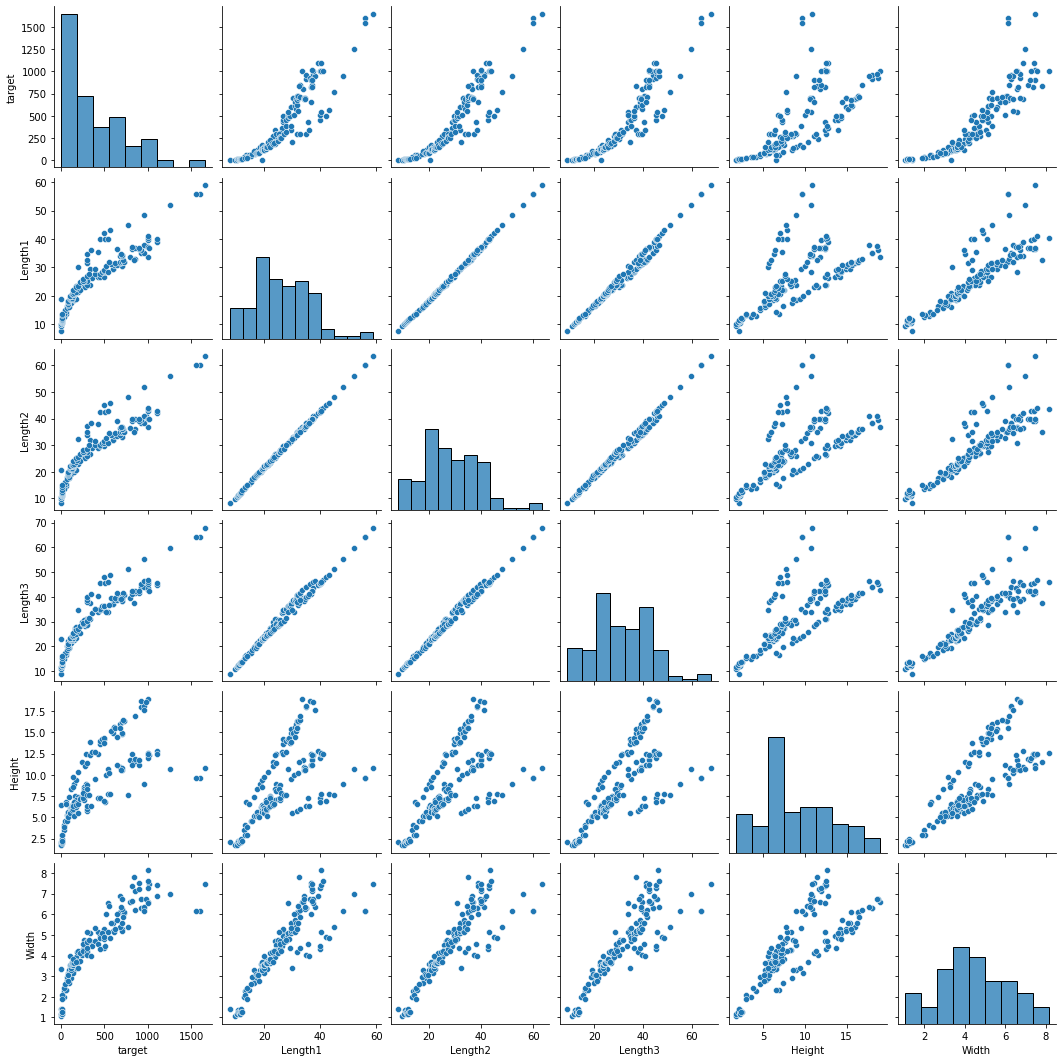

In [161]:
sns.pairplot(data_fish)

## 1.3 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый в соотношении 80%/20% при помощи функции train_test_split библиотеки sklearn.model_selection. При необходимости категориальные признаки в числовые (например, при помощи функции get_dummies библиотеки pandas).

In [308]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
X = data_fish[['Height','Width','Length1','Length2','Length3']].to_numpy()
y = data_fish['target']

X_train_fish, X_test_fish, y_train_fish, y_test_fish = train_test_split(X, y, test_size=0.2, random_state=0)

X_train_fish = poly.fit_transform(X_train_fish)
X_test_fish = poly.transform(X_test_fish)

## 1.4 OLS regression

Обучить модель линейной регрессии методом наименьших квадратов (ordinary least squares linear regression), импортировав класс `LinearRegression` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE. Посмотрите, как влияет исключение из набора данных выбросов (экстремальных значений, например, больше 95 квантиля) на оценку ошибки.



In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train_fish, y_train_fish)
y_pred = linreg.predict(X_test_fish)

mean_squared_error(y_test_fish, y_pred, squared=False)

71.51721125164727

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


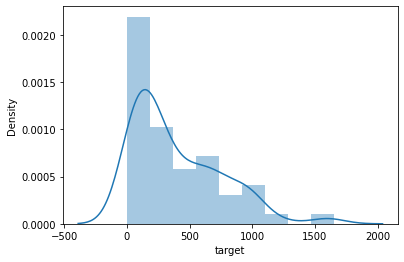

In [265]:
sns.distplot(data_fish['target'])

In [272]:
threshold = np.quantile(data_fish['target'], 0.95)
print('95 квантиль:', threshold)
data_fish_no_outliers = data_fish[data_fish['target']<=threshold]
data_fish_no_outliers.head()

95 квантиль: 1000.0


,Species,target,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


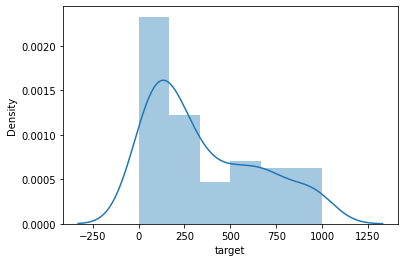

In [205]:
sns.distplot(data_fish_no_outliers['target'])

In [273]:
data_fish_no_outliers.shape

(152, 7)

In [274]:
# Модель после удаления выбросов

poly = PolynomialFeatures(2)
X2 = data_fish_no_outliers[['Height','Width','Length1','Length2','Length3']].to_numpy()
X2 = poly.fit_transform(X2)
y2 = data_fish_no_outliers['target']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=0)

linreg = LinearRegression()
linreg.fit(X_train2, y_train2)
y_pred = linreg.predict(X_test2)

mean_squared_error(y_test2, y_pred, squared=False)

54.40094737507258

## 1.5 Ridge regression

Обучить модель линейной регрессии с $L_2$-регуляризацией (Гребневая регрессия, Ridge regression), импортировав класс `Ridge` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE


In [275]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_fish, y_train_fish)
y_pred = ridge.predict(X_test_fish)
mean_squared_error(y_test_fish, y_pred, squared=False)

69.93774420937946

## 1.6 Lasso regression

Обучить модель линейной регрессии с $L_1$-регуляризацией (Lasso regression), импортировав класс `Lasso` из библиотеки `sklearn.linear_model`. Оцените ошибку вашей модели при помощи метрики RMSE

In [276]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_fish, y_train_fish)
y_pred = lasso.predict(X_test_fish)
mean_squared_error(y_test_fish, y_pred, squared=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+05, tolerance: 1.394e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


69.22702353795663

## 1.7 Оптимизация Ridge regression

Сделайте перебор в цикле гиперпараметра `alpha` для модели `Ridge` от 0 до 1 с шагом 0.05. Постройте график ошибки RMSE на тестовых данных в зависимости от гиперпараметра `alpha`

In [287]:
rmse = []
for alpha in np.linspace(0,1,21):
  ridge = Ridge(alpha=alpha)
  ridge.fit(X_train_fish, y_train_fish)
  y_pred = ridge.predict(X_test_fish)
  rmse.append(mean_squared_error(y_test_fish, y_pred, squared=False))

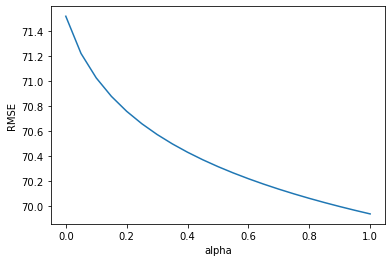

In [288]:
plt.plot(np.linspace(0,1,21), rmse)
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.show()

In [279]:
rmse

[71.51721125165069,
 71.21995183975672,
 71.02453865529982,
 70.87669643229533,
 70.75762731127432,
 70.65801270753191,
 70.57242690612051,
 70.49741486379543,
 70.43064412504948,
 70.37047156613191,
 70.3157003204611,
 70.26543409640782,
 70.21898579974928,
 70.17581792984652,
 70.13550222972711,
 70.09769213474634,
 70.06210307959596,
 70.02849847677405,
 69.99667923294413,
 69.96647620315453,
 69.93774420937946]

## 1.8 Вывод

Сравните качество (величину ошибки) для моделей из пп. 1.4-1.7. Какая модель показала наилучший результат?

Ваш ответ: наилучшая модель lasso с RMSE = 69.22702353795663

# 2. Задача классификации (9 баллов)

Постройте модель машинного обучения, решающую задачу классификации на вашем наборе данных. Задание считается выполненным, если соответствующая оценка качества на тестовой выборке >= baseline.

## 2.1 Загрузка данных

Загрузите данные в датафрейм при помощи функции `read_csv` блиблиотеки `pandas`

In [312]:
data = pd.read_csv('/content/spam.csv', usecols=['v1','v2'], encoding='latin-1')
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.3 Предобработка данных

Проведите необходимую предобработку (перенормировку, выделение главных компонент и т.д.) данных. Приведите данные к такому виду, чтобы их можно было использовать для обучения моделей.

In [313]:
data['target'] = (data['target']=='spam')*1
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [314]:
# Удаляем дубликаты в данных 
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [315]:
# Создаём новый признак - длина сообщения
data['length'] = data['text'].apply(len)

# Создаём новый признак - количество слов
data['words_count'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

# Создаём новый признак - количество предложений
data['sentences_count'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Удаляем пунктуацию
data['text'] = data['text'].apply(lambda x: x.translate(str.maketrans('','', string.punctuation)))

if False:
  # Добавляем счётчик слов в качестве признаков
  v = TfidfVectorizer(decode_error='ignore')
  x = v.fit_transform(data['text'])
else:
  v = CountVectorizer()
  x = v.fit_transform(data['text'])

words = pd.DataFrame(x.toarray(), columns=['_'+a for a in v.get_feature_names()])
data = pd.concat([data, words], axis=1)
data.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,target,text,length,words_count,sentences_count,_008704050406,_0089my,_0121,_01223585236,_01223585334,...,_ìï,_ìïll,_ûthanks,_ûªm,_ûªt,_ûªve,_ûï,_ûïharry,_ûò,_ûówell
0,0,Go until jurong point crazy Available only in ...,111,23,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,Ok lar Joking wif u oni,29,8,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,U dun say so early hor U c already then say,49,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,Nah I dont think he goes to usf he lives aroun...,61,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2.2 Разделение набора данных на тренировочный и тестовый

Разделите набор данных на тренировочный и тестовый при помощи функции `train_test_split` библиотеки ???

In [316]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['target', 'text'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 2.4 Логистическая регрессия
Обучите модель логистической регрессии, используя стандартную реализацию sklearn.linear_model.LogisticRegression. Оцените метрики качества полученной модели при помощи sklearn.metrics.classification_report и sklearn.metrics.f1_score.

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [119]:
y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
print()
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       885
        Spam       0.96      0.88      0.92       149

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


f1_score:  0.9513079513079513


## 2.5 Подбор гиперпараметра регуляризации

При помощи sklearn.model_selection.GridSearchCV переберите оптимальные параметры C в диапазоне 0.01 до 1 с шагом 0.1.

In [120]:
from sklearn.model_selection import GridSearchCV

grid = {"C": np.linspace(0.01,0.91,10), "max_iter": [1000]}
logreg_cv = GridSearchCV(LogisticRegression(), grid, cv=4, scoring='f1_micro')
logreg_cv.fit(X_train, y_train)

print(logreg_cv.best_params_)
print("score:", logreg_cv.best_score_)

{'C': 0.91, 'max_iter': 1000}
score: 0.9775098256566197


## 2.6 Выводы

Сравните качество (величину ошибки) для моделей из пп. 2.4-2.5. Какая модель показала наилучший результат?

In [320]:
logreg_best = LogisticRegression(C=0.91, max_iter=1000)
logreg_best.fit(X_train, y_train)

LogisticRegression(C=0.91, max_iter=1000)

In [321]:
y_pred = logreg_best.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))
print()
print('f1_score: ', f1_score(y_test, y_pred, average='macro'))

              precision    recall  f1-score   support

         Ham       0.98      0.99      0.99       885
        Spam       0.96      0.88      0.92       149

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


f1_score:  0.9513079513079513


Ваш ответ: Они идентичны. f1_score буквально одинаковый.

# 3. Самописная линейная регрессия (3 балла)

Релизовать алгоритм построения модели линейной регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [322]:
np.sign([2,3,-3])

array([ 1,  1, -1])

In [362]:
X2 = [[1,2,3],[4,5,6]]
w2 = [5,6,7]

np.dot(X2[0], w2)

38

In [385]:
class SGDLinearRegression:
    def __init__(self, epsilon = 0.000001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon

    def fit(self, X, y, iterations=500):
        y = np.asarray(y)
        X = np.asarray(X)


        self.w = np.zeros(X.shape[1])
        self.bias = 0
        loss_history = []

        np.random.seed(0)

        for _ in range(iterations):
          y_pred = np.zeros(X.shape[0])

          # Случайно мешаем выборку
          shuffled_indices = np.random.permutation(len(X))
          X = X[shuffled_indices]
          y = y[shuffled_indices]

          for i in range(X.shape[0]):
            #i = np.random.randint(X.shape[0])

            y_pred[i] = self.predict(X[i])

            s = np.sign(y_pred[i] - y[i])
            self.w -= self.epsilon * (X[i] * s)
            self.bias -= self.epsilon * s

          loss_history.append(mean_squared_error(y, y_pred, squared=False))

        return loss_history
    
    def predict(self, X):
        return np.dot(X, self.w) + self.bias

3.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

До нормировки: 141.73951807396742


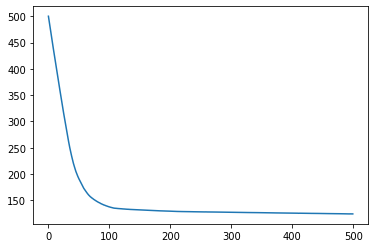

In [404]:
mySGD = SGDLinearRegression(epsilon = 0.00000001)
loss_history = mySGD.fit(X_train_fish, y_train_fish)

y_pred = mySGD.predict(X_test_fish)
print('До нормировки:', mean_squared_error(y_test_fish, y_pred, squared=False))

plt.plot(loss_history)
plt.show()

После нормировки: 87.57675185335859


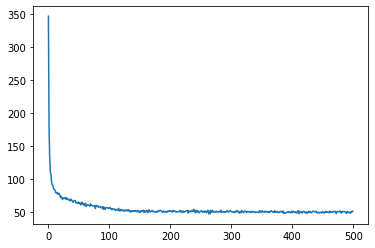

In [402]:
scaler = MinMaxScaler()
X_train_fish2 = scaler.fit_transform(X_train_fish)
X_test_fish2 = scaler.transform(X_test_fish)

mySGD = SGDLinearRegression(epsilon = 1)
loss_history = mySGD.fit(X_train_fish2, y_train_fish)
y_pred = mySGD.predict(X_test_fish2)
print('После нормировки:', mean_squared_error(y_test_fish, y_pred, squared=False))
plt.plot(loss_history)
plt.show()

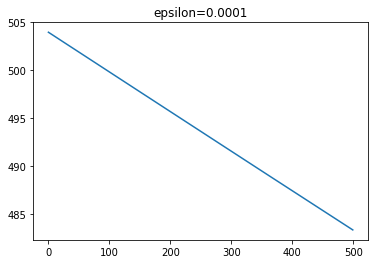

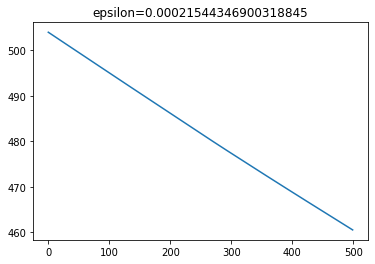

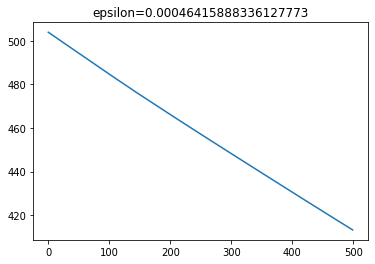

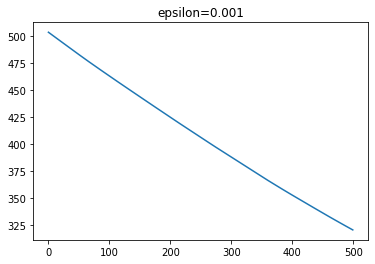

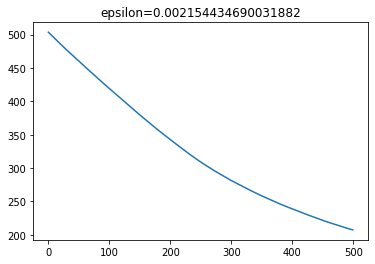

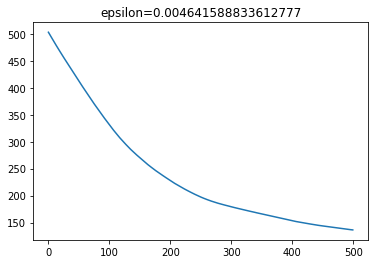

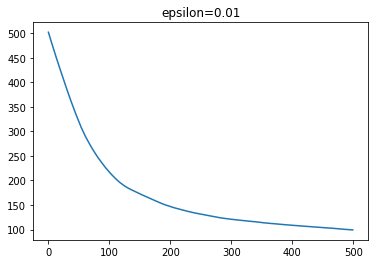

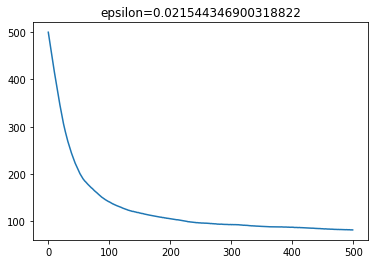

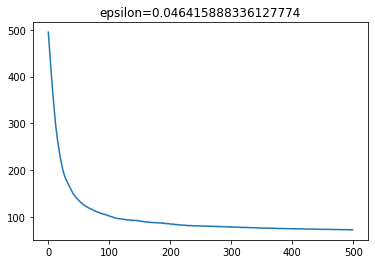

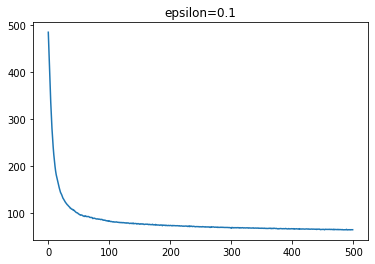

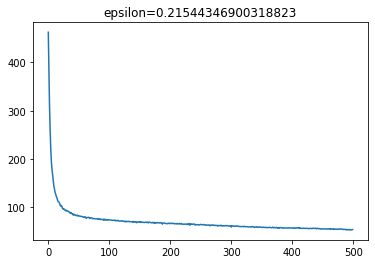

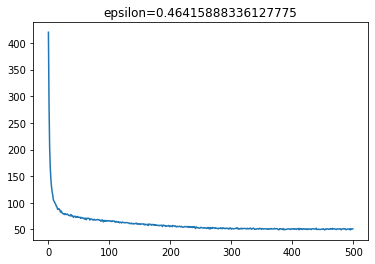

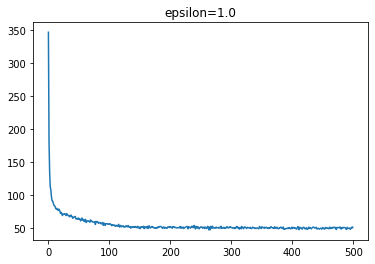

In [403]:
for epsilon in np.geomspace(0.0001, 1, num=13):
    mySGD = SGDLinearRegression(epsilon = epsilon)
    loss_history = mySGD.fit(X_train_fish2, y_train_fish)
    plt.plot(loss_history)
    plt.title(f'epsilon={epsilon}')
    plt.show()

3.3 Обучите модель на основе класса sklearn.linear_model.SGDRegressor с параметрами `alpha=0`. Сравните качество с вашими моделями из пункта 3.2.

In [311]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

sgd = SGDRegressor(alpha=0, max_iter=100000)
sgd.fit(X_train_fish, y_train_fish)
y_pred = sgd.predict(X_test_fish)
print('До нормировки:', mean_squared_error(y_test_fish, y_pred, squared=False))

scaler = MinMaxScaler()
X_train_fish2 = scaler.fit_transform(X_train_fish)
X_test_fish2 = scaler.transform(X_test_fish)

sgd.fit(X_train_fish2, y_train_fish)
y_pred = sgd.predict(X_test_fish2)
print('После нормировки:', mean_squared_error(y_test_fish, y_pred, squared=False))

До нормировки: 9446628032484186.0
После нормировки: 82.79241728353928


Ваш вывод (2-3 предложения):

Нормировка данных очень важна для обучения обоих моделей. После MinMax нормировки обе модели показали существенное улучшение результатов.

Стандартная реализация SGDRegressor выдала RMSE 82.79, что лучше самописанного SGD с RMSE 87.58

# 4. Самописная логистическая регрессия (4 балла)

Релизовать алгоритм построения модели логистической регрессии методом стохастического градиентного спуска (stochastic gradient descent, SGD) при помощи библиотек numpy, pytorch или tensorflow.

In [468]:
import torch

class SGDLogisticRegression:
    def __init__(self, epsilon = 0.001):
        self.w = None
        self.bias = None
        self.epsilon = epsilon

    def sigmoid(self, a):
        return  1. / (1. + np.exp(-1. * a))

    def fit(self, X, y, iterations=500):
        y = np.asarray(y)
        X = np.asarray(X)

        self.w = np.zeros(X.shape[1])
        self.bias = 0

        loss_history = []

        for i in range(iterations):
            x_dot_weights = np.matmul(self.w, X.T) + self.bias
            pred = self.sigmoid(x_dot_weights)
            error_w, error_b = self.compute_gradients(X, y, pred)

            self.w -= error_w * self.epsilon
            self.bias -= error_b * self.epsilon

            loss = self.compute_loss(y, pred)
            loss_history.append(loss)

        return loss_history

    def compute_gradients(self, x, y_true, y_pred):
        difference =  y_pred - y_true
        gradient_b = np.mean(difference)
        gradients_w = np.matmul(x.transpose(), difference)
        gradients_w = np.array([np.mean(grad) for grad in gradients_w])

        return gradients_w, gradient_b

    def compute_loss(self, y_true, y_pred):
        y_zero_loss = y_true * np.log(y_pred)
        y_one_loss = (1-y_true) * np.log(1 - y_pred)
        return -np.mean(y_zero_loss + y_one_loss)


    def predict(self, X):
        x_dot_weights = np.matmul(self.w, X.T) + self.bias
        pred = self.sigmoid(x_dot_weights)
        return pred > 0.5

4.2 Обучите самописную модель. Воспользуйтесь sklearn.model_selection.GridSearchCV для подбора гипермапарметра (шага обновления градиента) epsilon среди `numpy.geomspace(0.0001, 1, num=13)`. Постройте график функции ошибки для epsilon `[0.0001, 0.001, 0.01, 0.1, 1]`.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


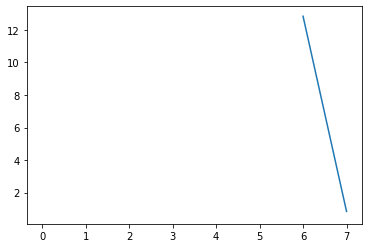

0.4611776967170401

In [469]:
mySGD = SGDLogisticRegression(epsilon = 0.00001)

loss_history = mySGD.fit(X_train, y_train, 10)
y_pred = mySGD.predict(X_test)

plt.plot(loss_history)
plt.show()

f1_score(y_test, y_pred, average='macro')

 4.3 Обучите модель на основе класса sklearn.linear_model.SGDClassifier с параметрами `loss='log'`. Сравните качество с вашими моделями из пункта 4.2.

In [319]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler

sgd = SGDClassifier(loss='log', max_iter=100000)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.857032050936168

Ваш вывод (2-3 предложения):